In [ ]:
#Yağızcan Ürkmez 
import xarray as xr
ds_cmip = xr.open_dataset("/Volumes/YagizHDD/Meteorological-Applications/DATA/CMIP6/tsl_Lmon_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_185001-201412.nc",chunks={'time': 10})
ds_era_5 = xr.open_dataset("/Volumes/YagizHDD/Meteorological-Applications/DATA/ERA5/ecmwf_soiltemp_1995_2014.nc")

In [13]:
ds_era_5

<xarray.Dataset> Size: 317kB
Dimensions:     (valid_time: 240, latitude: 9, longitude: 9)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 2kB 1995-01-01 ... 2014-12-01
  * latitude    (latitude) float64 72B 42.0 41.75 41.5 41.25 ... 40.5 40.25 40.0
  * longitude   (longitude) float64 72B 26.0 26.25 26.5 ... 27.5 27.75 28.0
    expver      (valid_time) <U4 4kB ...
Data variables:
    stl1        (valid_time, latitude, longitude) float32 78kB ...
    stl2        (valid_time, latitude, longitude) float32 78kB ...
    stl3        (valid_time, latitude, longitude) float32 78kB ...
    stl4        (valid_time, latitude, longitude) float32 78kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [14]:
soil_1_cmip = ds_cmip["tsl"].sel(time=slice("1995-01-01", "2014-12-31"))[:,0,:,:]
soil_1_era = ds_era_5["stl1"]

In [71]:
soil_1_cmip

<xarray.DataArray 'tsl' (time: 240, lat: 360, lon: 720)> Size: 249MB
dask.array<getitem, shape=(240, 360, 720), dtype=float32, chunksize=(10, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 3kB -89.62 -89.12 -88.62 -88.13 ... 88.62 89.12 89.62
  * lon      (lon) float64 6kB 0.0 0.5 1.0 1.5 2.0 ... 358.0 358.5 359.0 359.5
    sdepth   float64 8B 0.005
  * time     (time) datetime64[ns] 2kB 1995-01-16T12:00:00 ... 2014-12-16T12:...
Attributes:
    long_name:           Temperature of Soil
    units:               K
    online_operation:    average
    cell_methods:        area: mean where land time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       soil_temperature
    description:         Temperature of each soil layer.  Reported as "missin...
    history:             none
    cell_measures:       area: areacella

In [102]:
#Finding wanted latitude and longitude

def wanted_lat_lon(df,lat,lon,var_lat,var_lon):
    lat_values=df[var_lat].values
    lon_values=df[var_lon].values
    res_lat = lat_values[1]-lat_values[0]
    res_lon = lon_values[1]-lon_values[0]
    lat_num=(abs(min(lat_values)-lat).round()*abs(1/(res_lat)).round()) # wanted latitude for spesific point
    lon_num=(abs(min(lon_values)-lon)*abs(1/(res_lon))).round() # wanted longitude for spesific point
    print(f"Latitude number is: {int(lat_num)}") 
    print(f"Longitude number is: {int(lon_num)}")
    return int(lat_num), int(lon_num)

lat_num_cmip,lon_num_cmip =  wanted_lat_lon(soil_1_cmip,40.97,27.47,"lat","lon")
lat_num_era,lon_num_era =  wanted_lat_lon(soil_1_era,40.97,27.47,"latitude","longitude")


Latitude number is: 262
Longitude number is: 55
Latitude number is: 4
Longitude number is: 6


In [114]:
# Quince Garden Data 40.97, 27.47

soil_1_cmip_59 = soil_1_cmip[:,lat_num_cmip,lon_num_cmip]-273.15
soil_1_era_59 = soil_1_era[:,lat_num_era,lon_num_era]-273.15

In [122]:
import pandas as pd
# Convert time values to Pandas DataFrame
df_soil_1 = pd.DataFrame({
    "Time": soil_1_cmip_59.time.values,
    "Soil Temperature CNRM": soil_1_cmip_59.values,
    "Soil Temperature ERA5": soil_1_era_59.values
})



CNRM-CM6-1-HR 
Mean:14.66 C°
Max:31.97 C°
Min:-1.27 C°
Range:33.25 C°
Standard Deviation:9.10 C°
ERA5 
Mean:15.85 C°
Max:29.05 C°
Min:4.56 C°
Range:24.49 C°
Standard Deviation:7.14 C°


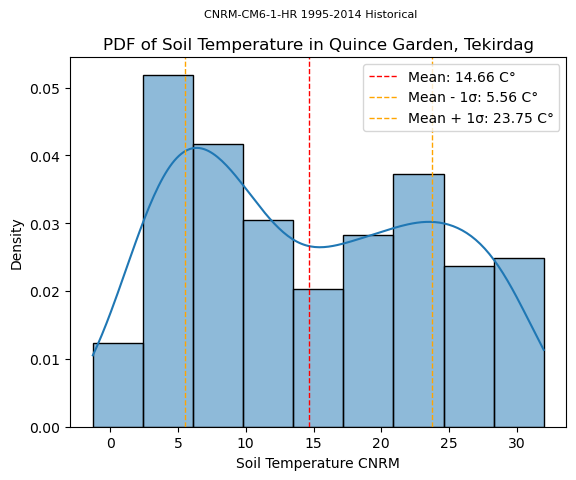

In [359]:
#PDF
mean_cmip= df_soil_1["Soil Temperature CNRM"].mean()
max_cmip = df_soil_1["Soil Temperature CNRM"].max()
min_cmip = df_soil_1["Soil Temperature CNRM"].min()
range_cmip = max_cmip - min_cmip
sigma_cmip = df_soil_1["Soil Temperature CNRM"].std()
mean_era5 = df_soil_1["Soil Temperature ERA5"].mean()
max_era5 = df_soil_1["Soil Temperature ERA5"].max()
min_era5 = df_soil_1["Soil Temperature ERA5"].min()
range_era5 = max_era5 - min_era5
sigma_era5 = df_soil_1["Soil Temperature ERA5"].std()
print("CNRM-CM6-1-HR ")
print(f"Mean:{mean_cmip:.2f} C°")
print(f"Max:{max_cmip:.2f} C°")
print(f"Min:{min_cmip:.2f} C°")
print(f"Range:{range_cmip:.2f} C°")
print(f"Standard Deviation:{sigma_cmip:.2f} C°")
print("ERA5 ")
print(f"Mean:{mean_era5:.2f} C°")
print(f"Max:{max_era5:.2f} C°")
print(f"Min:{min_era5:.2f} C°")
print(f"Range:{range_era5:.2f} C°")
print(f"Standard Deviation:{sigma_era5:.2f} C°")



#Plot the pdf of the data
ax=sns.histplot(df_soil_1["Soil Temperature CNRM"], kde=True, stat='density') 
ax.axvline(mean_cmip, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_cmip:.2f} C°')
ax.axvline(mean_cmip - sigma_cmip, color='orange', linestyle='dashed', linewidth=1, label=f'Mean - 1σ: {mean_cmip - sigma_cmip:.2f} C°')
ax.axvline(mean_cmip + sigma_cmip, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + 1σ: {mean_cmip + sigma_cmip:.2f} C°')
ax.legend()
plt.title('PDF of Soil Temperature in Quince Garden, Tekirdag')
plt.suptitle('CNRM-CM6-1-HR 1995-2014 Historical',fontsize=8)
#ax.set_title("CMIP6 Soil Temperature (CNRM) PDF")
plt.show()

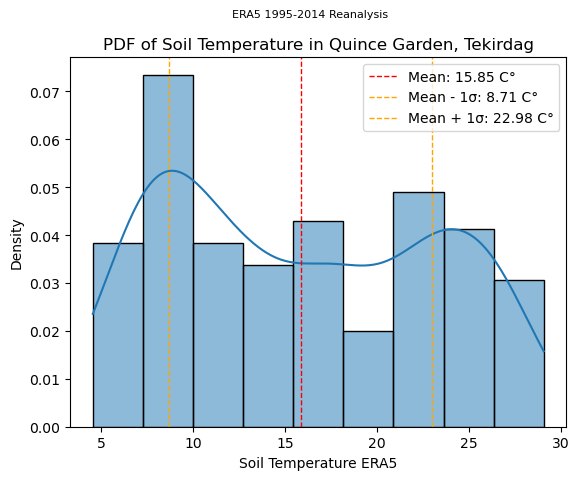

In [160]:


#Plot the pdf of the data
ax=sns.histplot(df_soil_1["Soil Temperature ERA5"], kde=True, stat='density') 
ax.axvline(mean_era5, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_era5:.2f} C°')
ax.axvline(mean_era5 - sigma_era5, color='orange', linestyle='dashed', linewidth=1, label=f'Mean - 1σ: {mean_era5 - sigma_era5:.2f} C°')
ax.axvline(mean_era5 + sigma_era5, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + 1σ: {mean_era5 + sigma_era5:.2f} C°')
ax.legend()
plt.title('PDF of Soil Temperature in Quince Garden, Tekirdag')
plt.suptitle('ERA5 1995-2014 Reanalysis',fontsize=8)
plt.show()

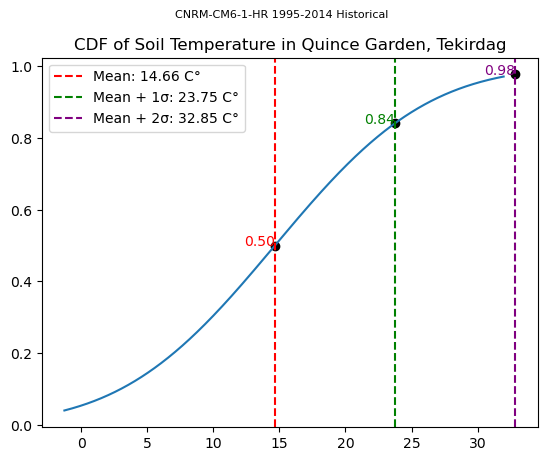

In [159]:
from scipy.stats import norm
import numpy as np

x= np.linspace(df_soil_1["Soil Temperature CNRM"].min(), df_soil_1["Soil Temperature CNRM"].max(), 1000)
mu = mean_cmip
sigma = sigma_cmip

plt.plot(x, norm.cdf(x, mu, sigma))
plt.axvline(x=mu, color='r', linestyle='--',label=f'Mean: {mu:.2f} C°')
plt.axvline(x=mu + sigma, color='g', linestyle='--', label=f'Mean + 1σ: {mu + sigma:.2f} C°')
plt.axvline(x=mu + 2*sigma, color='purple', linestyle='--', label=f'Mean + 2σ: {mu + 2*sigma:.2f} C°')
# Highlight the intersection point of the mean line on the CDF
cdf_value_at_mu = norm.cdf(mu, mu, sigma)
plt.scatter(mu, cdf_value_at_mu, color='black')
plt.text(mu,cdf_value_at_mu,f'{cdf_value_at_mu:.2f}', color='r', ha='right')
cdf_value_at_mu_plus_sigma = norm.cdf(mu + sigma, mu, sigma)
plt.scatter(mu + sigma, cdf_value_at_mu_plus_sigma, color='black')
plt.text(mu + sigma, cdf_value_at_mu_plus_sigma, f'{cdf_value_at_mu_plus_sigma:.2f}', color='g', ha='right')
cdf_value_at_mu_plus_2sigma = norm.cdf(mu + 2 * sigma, mu, sigma)
plt.scatter(mu + 2 * sigma, cdf_value_at_mu_plus_2sigma, color='black')
plt.text(mu + 2 * sigma, cdf_value_at_mu_plus_2sigma, f'{cdf_value_at_mu_plus_2sigma:.2f}', color='purple', ha='right')



plt.title('CDF of Soil Temperature in Quince Garden, Tekirdag')
plt.suptitle('CNRM-CM6-1-HR 1995-2014 Historical',fontsize=8)
plt.legend()

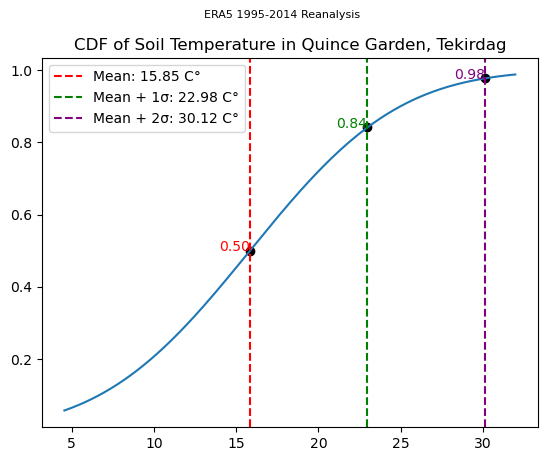

In [161]:
x= np.linspace(df_soil_1["Soil Temperature ERA5"].min(), df_soil_1["Soil Temperature CNRM"].max(), 1000)
mu = mean_era5
sigma = sigma_era5

plt.plot(x, norm.cdf(x, mu, sigma))
plt.axvline(x=mu, color='r', linestyle='--',label=f'Mean: {mu:.2f} C°')
plt.axvline(x=mu + sigma, color='g', linestyle='--', label=f'Mean + 1σ: {mu + sigma:.2f} C°')
plt.axvline(x=mu + 2*sigma, color='purple', linestyle='--', label=f'Mean + 2σ: {mu + 2*sigma:.2f} C°')
# Highlight the intersection point of the mean line on the CDF
cdf_value_at_mu = norm.cdf(mu, mu, sigma)
plt.scatter(mu, cdf_value_at_mu, color='black')
plt.text(mu,cdf_value_at_mu,f'{cdf_value_at_mu:.2f}', color='r', ha='right')
cdf_value_at_mu_plus_sigma = norm.cdf(mu + sigma, mu, sigma)
plt.scatter(mu + sigma, cdf_value_at_mu_plus_sigma, color='black')
plt.text(mu + sigma, cdf_value_at_mu_plus_sigma, f'{cdf_value_at_mu_plus_sigma:.2f}', color='g', ha='right')
cdf_value_at_mu_plus_2sigma = norm.cdf(mu + 2 * sigma, mu, sigma)
plt.scatter(mu + 2 * sigma, cdf_value_at_mu_plus_2sigma, color='black')
plt.text(mu + 2 * sigma, cdf_value_at_mu_plus_2sigma, f'{cdf_value_at_mu_plus_2sigma:.2f}', color='purple', ha='right')



plt.title('CDF of Soil Temperature in Quince Garden, Tekirdag')
plt.suptitle('ERA5 1995-2014 Reanalysis',fontsize=8)
plt.legend()

In [365]:
#Taken from https://github.com/milicak/Data_Analysis_Course

# norm.cdf() calculates the cumulative probability
N = 25
prob_more_than_N_cmip= 1-norm.cdf(N, mean_cmip, sigma_cmip)
prob_more_than_N_era= 1-norm.cdf(N, mean_era5, sigma_era5)
print(
    "The probability that soil temperature more than", str(N), "is for CNRM-CM6-1-HR",
    round(prob_more_than_N_cmip, 4),
)

print(
    "The probability that soil temperature more than", str(N), "is for ERA5",
    round(prob_more_than_N_era, 4),
)
# Calculate the area under the curve up to x = N
area_under_curve_cmip = 1-norm.cdf(N, mean_cmip, sigma_cmip)
area_under_curve_era5 = 1-norm.cdf(N, mean_era5, sigma_era5)


The probability that soil temperature more than 25 is for CNRM-CM6-1-HR 0.1278
The probability that soil temperature more than 25 is for ERA5 0.0998


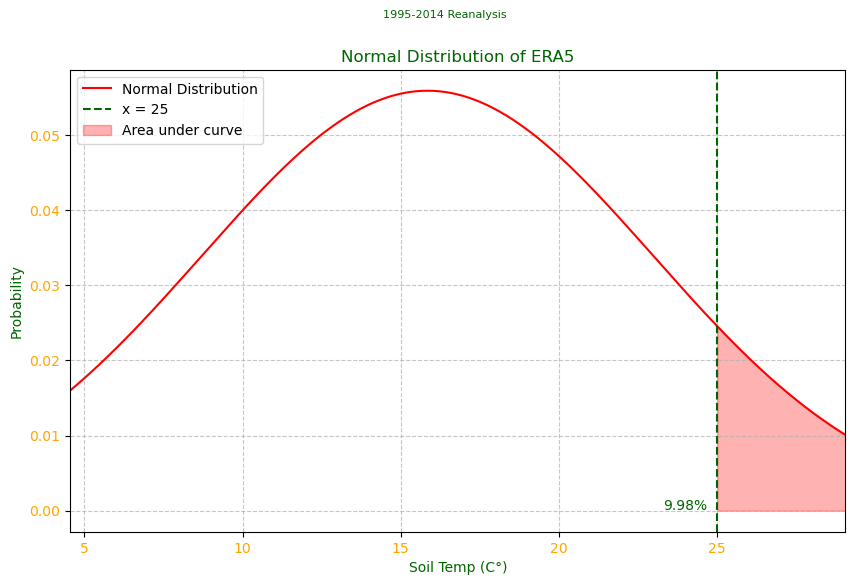

In [378]:
#Taken from https://github.com/milicak/Data_Analysis_Course

x3= np.linspace(float(df_soil_1["Soil Temperature ERA5"].min()), float(df_soil_1["Soil Temperature ERA5"].max()), 1000)

fig, ax = plt.subplots(figsize=(10, 6))
# Plot the pdf of the normal distribution
ax.plot(x3, norm.pdf(x3, mean_era5, sigma_era5), color="red", label="Normal Distribution")
# Draw a red vertical line at x = N
ax.axvline(x=N, color="darkgreen", linestyle="--", label=("x = "+str(N)))

# Create an array of 50 numbers between min of x array and N
x1 = np.linspace(x3.max(), N, 50)

# Fill the specified region with red color
ax.fill_between(x1, norm.pdf(x1, mean_era5, sigma_era5), color="red", alpha=0.3, label="Area under curve")

ax.set(xlabel="Soil Temp (C°)", ylabel="Probability")

ax.xaxis.label.set_color("darkgreen")
ax.yaxis.label.set_color("darkgreen")
plt.xlim(min_era5,max_era5)

ax.set_title("Normal Distribution of ERA5", color="darkgreen")
plt.suptitle("1995-2014 Reanalysis", fontsize=8, color="darkgreen")

# Add the percentage value on the plot
ax.text(N-1, 0.00015, f"{area_under_curve_era5 * 100:.2f}%", color="darkgreen", fontsize=10, ha='center')

ax.legend()

plt.xticks(color='orange')
plt.yticks(color='orange')

# Customize the grid lines
ax.grid(True, linestyle='--', alpha=0.7)

Text(0.5, 0.98, '1995-2014')

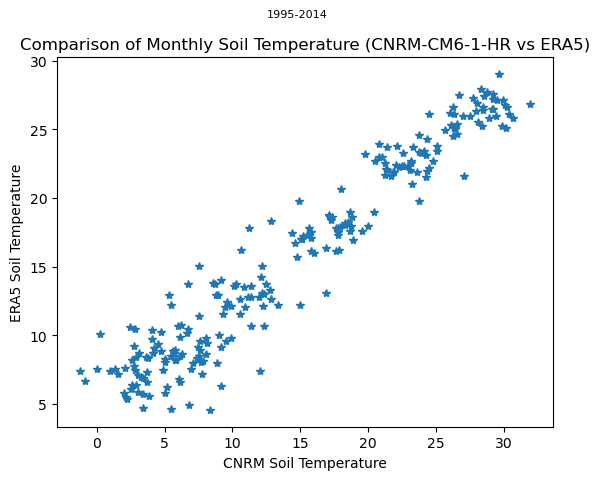

In [379]:
X = df_soil_1["Soil Temperature CNRM"].values
Y = df_soil_1["Soil Temperature ERA5"].values

ax=plt.plot(X,Y,'*')
plt.xlabel('CNRM Soil Temperature')
plt.ylabel('ERA5 Soil Temperature')
plt.title("Comparison of Monthly Soil Temperature (CNRM-CM6-1-HR vs ERA5)")
plt.suptitle('1995-2014',fontsize=8)

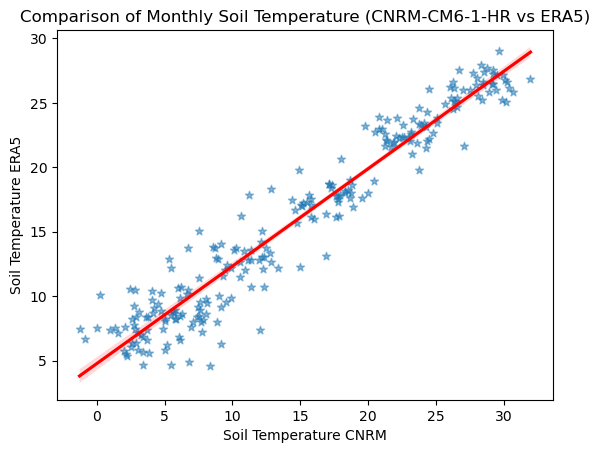

In [198]:
import seaborn as sns

ax =sns.regplot(x=df_soil_1["Soil Temperature CNRM"], y=df_soil_1["Soil Temperature ERA5"], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'},marker="*")
ax.set_title("Comparison of Monthly Soil Temperature (CNRM-CM6-1-HR vs ERA5)")


plt.show()

In [380]:
import scipy.stats as st                                    
from sklearn.linear_model import LinearRegression

linear = st.linregress(df_soil_1["Soil Temperature CNRM"], df_soil_1["Soil Temperature ERA5"])
print("Slope: ", linear.slope)
print("Intercept: ", linear.intercept)
print("R-value: ", linear.rvalue)
print("P-value: ", linear.pvalue)
print("Standard Error: ", linear.stderr)
# Equation of the line
print(f"The equation of the line is: y = {linear.slope:.2f}x + {linear.intercept:.2f}")

Slope:  0.7558401207318887
Intercept:  4.768877811663135
R-value:  0.9635578589885297
P-value:  2.705459975656282e-138
Standard Error:  0.013601520426315104
The equation of the line is: y = 0.76x + 4.77


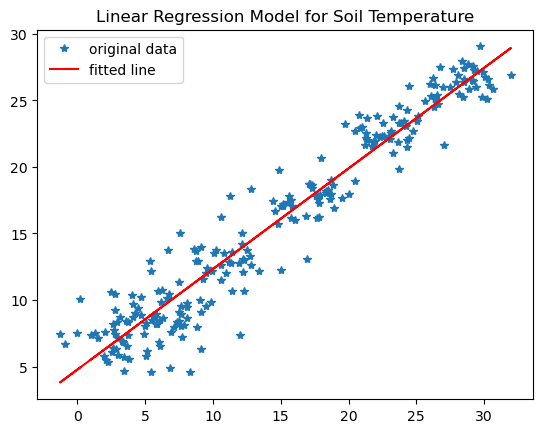

In [200]:
plt.plot(X, Y, '*', label='original data')
plt.plot(X, linear.intercept + linear.slope*X, 'r', label='fitted line')
plt.legend()
plt.title("Linear Regression Model for Soil Temperature")
plt.show()

In [201]:
#Calculate confidence interval for slope %95
alpha = 0.05
tstat = st.t.ppf([alpha/2,1-alpha/2], len(X)-2)            # calculate t-stat for confidence interval
slope_lower,slope_upper = linear.slope + tstat*linear.stderr

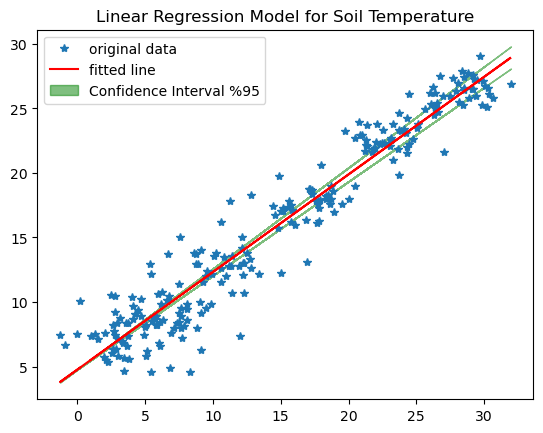

In [381]:
plt.plot(X, Y, '*', label='original data')
plt.plot(X, linear.intercept + linear.slope*X, 'r', label='fitted line')
plt.fill_between(X, slope_lower*X + linear.intercept, slope_upper*X + linear.intercept, color='green', alpha=0.5, label='Confidence Interval %95')
plt.legend()
plt.title("Linear Regression Model for Soil Temperature")
plt.show()

In [211]:
# For ssp245

ds_cmip_ssp = xr.open_dataset("/Volumes/YagizHDD/Meteorological-Applications/DATA/CMIP6/tsl_Lmon_CNRM-CM6-1-HR_ssp245_r1i1p1f2_gr_201501-210012.nc",chunks={'time': 10})
ds_era_5_fssp= xr.open_dataset("/Volumes/YagizHDD/Meteorological-Applications/DATA/ERA5/ecmwf_soiltemp_2015_2024.nc")

In [330]:
soil_1_cmip_ssp = ds_cmip_ssp["tsl"].sel(time=slice("2015-01-01", "2040-12-31"))[:,0,:,:]
soil_1_era_fssp = ds_era_5_fssp["stl1"]

# Quince Garden Data 40.97, 27.47

soil_1_cmip_ssp_59 = soil_1_cmip_ssp[:,lat_num_cmip,lon_num_cmip]-273.15
soil_1_era_fssp_59 = soil_1_era_fssp[:,lat_num_era,lon_num_era]-273.15



In [342]:
# Convert time values to Pandas DataFrame
# df_soil_1_ssp = pd.DataFrame({
#     "Time": soil_1_cmip_ssp_59.time.values,
#     "Soil Temperature CNRM": soil_1_cmip_ssp_59.values,
#     "Soil Temperature ERA5": soil_1_era_fssp_59.values.fillna()
# })

# Create DataFrame
df_soil_1_ssp = pd.DataFrame({
    "Time": soil_1_cmip_ssp_59.time.values,  # Time (same length as CNRM)
    "Soil Temperature CNRM": soil_1_cmip_ssp_59.values,  # Full-length CNRM data
})

# 📌 Convert ERA5 to DataFrame with Time as Index
df_era5 = pd.DataFrame({
    "Time": soil_1_cmip_ssp.time[0:120].values, 
    "Soil Temperature ERA5": soil_1_era_fssp_59.values
})

# 📌 Merge CNRM & ERA5 on "Time", Filling Missing Values with NaN
df_soil_1_ssp = df_soil_1_ssp.merge(df_era5, how="left",on="Time")

In [341]:
df_era5

,Time,Soil Temperature ERA5
0,2015-01-16 12:00:00,7.049225
1,2015-02-15 00:00:00,7.698151
2,2015-03-16 12:00:00,9.076080
3,2015-04-16 00:00:00,11.971100
4,2015-05-16 12:00:00,18.981110
...,...,...
115,2024-08-16 12:00:00,27.700348
116,2024-09-16 00:00:00,24.172760
117,2024-10-16 12:00:00,18.865387
118,2024-11-16 00:00:00,12.904205


Text(0, 0.5, 'ERA5 Soil Temperature (C°)')

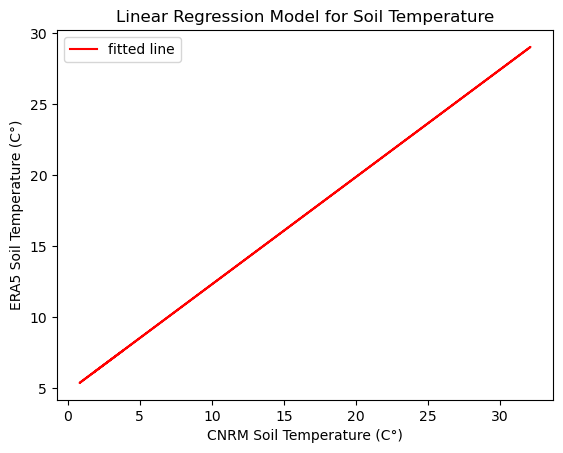

In [344]:
#Train and test model

X_train= df_soil_1[["Soil Temperature CNRM"]]
Y_train= df_soil_1["Soil Temperature ERA5"]
X_test = df_soil_1_ssp[["Soil Temperature CNRM"]]
Y_test = df_soil_1_ssp["Soil Temperature ERA5"]

model = LinearRegression()
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
plt.plot(X_test, Y_pred, 'r', label='fitted line')
plt.legend()
plt.title("Linear Regression Model for Soil Temperature")
plt.xlabel("CNRM Soil Temperature (C°)")
plt.ylabel("ERA5 Soil Temperature (C°)")


In [348]:
Y_test[0:120]

0       7.049225
1       7.698151
2       9.076080
3      11.971100
4      18.981110
         ...    
115    27.700348
116    24.172760
117    18.865387
118    12.904205
119    10.298981
Name: Soil Temperature ERA5, Length: 120, dtype: float32

In [349]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(Y_test[0:120], Y_pred[0:120])  # R-squared score
mse = mean_squared_error(Y_test[0:120], Y_pred[0:120])  # Mean Squared Error

print(f"Regression Coefficient (Slope): {model.coef_[0]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

Regression Coefficient (Slope): 0.756
Intercept: 4.769
R² Score: 0.923
Mean Squared Error: 3.818


In [350]:
model_linear = pd.DataFrame({"Time": df_soil_1_ssp["Time"].values,
                             "Soil Temperature LinearM": Y_pred,
                             "Soil Temperature CNRM": df_soil_1_ssp["Soil Temperature CNRM"].values,
                             "Soil Temperature ERA5": df_soil_1_ssp["Soil Temperature ERA5"].values})

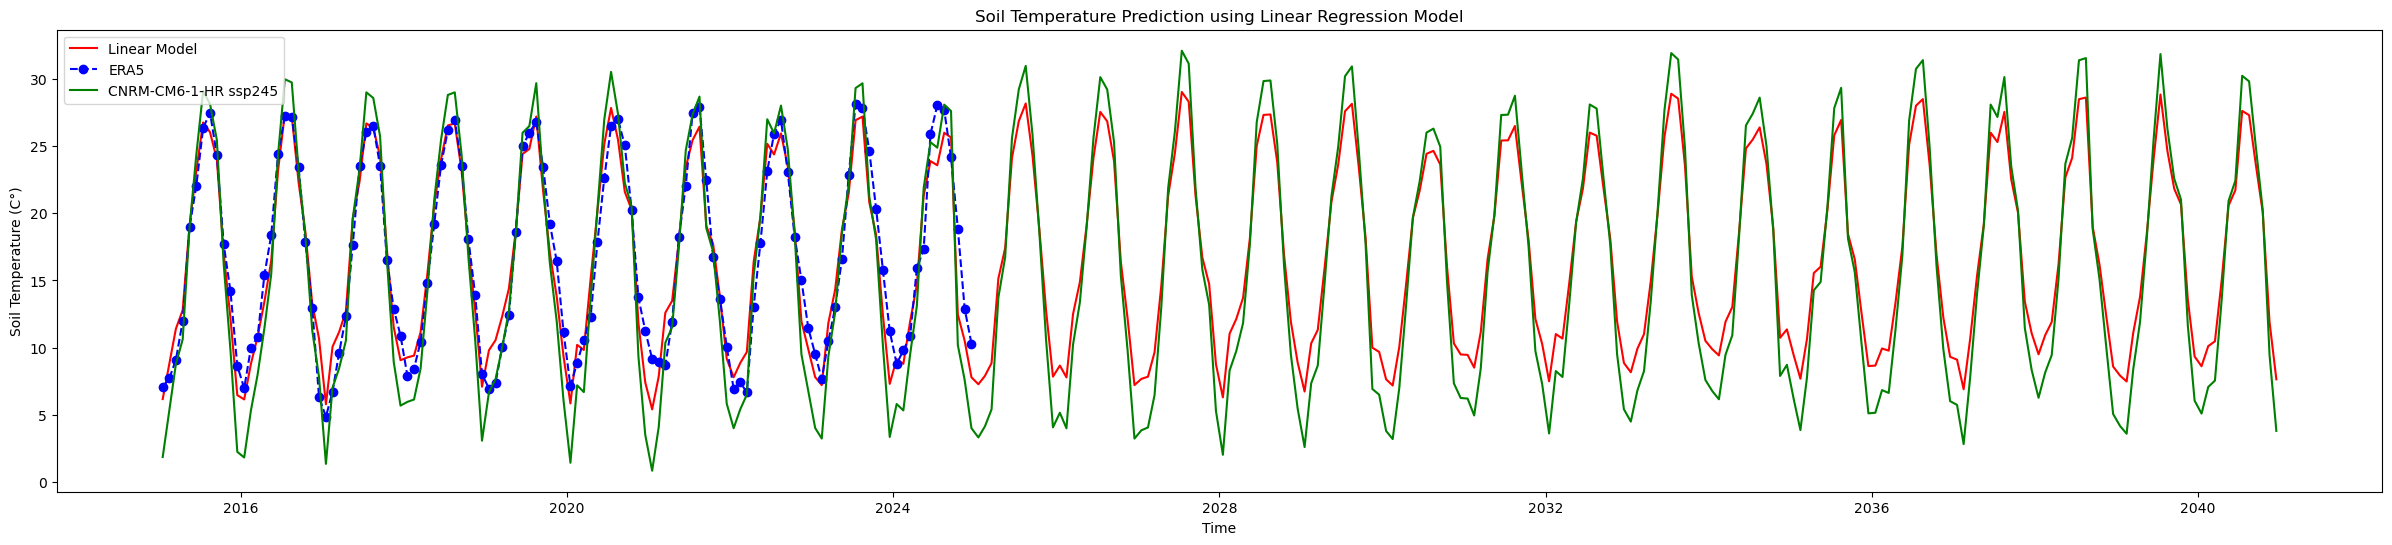

In [351]:

fig, ax = plt.subplots(figsize=(30, 6))
plt.plot(model_linear["Time"], model_linear["Soil Temperature LinearM"], label="Linear Model", color='red')
plt.plot(model_linear["Time"], model_linear["Soil Temperature ERA5"], label="ERA5",marker="o",linestyle="dashed", color='blue')
plt.plot(model_linear["Time"], model_linear["Soil Temperature CNRM"], label="CNRM-CM6-1-HR ssp245", color='green')
plt.xlabel("Time")
plt.ylabel("Soil Temperature (C°)")
plt.title("Soil Temperature Prediction using Linear Regression Model")
plt.legend(loc="upper left")

In [352]:
#Correlation and FFT
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau

# Calculate Spearman correlation
spearman_corr, spearman_pval = spearmanr(df_soil_1["Soil Temperature CNRM"], df_soil_1["Soil Temperature ERA5"])
print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {spearman_pval:.3f}")
# Calculate Pearson correlation
pearson_corr, pearson_pval = pearsonr(df_soil_1["Soil Temperature CNRM"], df_soil_1["Soil Temperature ERA5"])
print(f"Pearson Correlation: {pearson_corr:.3f}, p-value: {pearson_pval:.3f}")
# Calculate Kendall correlation
kendall_corr, kendall_pval = kendalltau(df_soil_1["Soil Temperature CNRM"], df_soil_1["Soil Temperature ERA5"])
print(f"Kendall Correlation: {kendall_corr:.3f}, p-value: {kendall_pval:.3f}")

Spearman Correlation: 0.946, p-value: 0.000
Pearson Correlation: 0.964, p-value: 0.000
Kendall Correlation: 0.794, p-value: 0.000


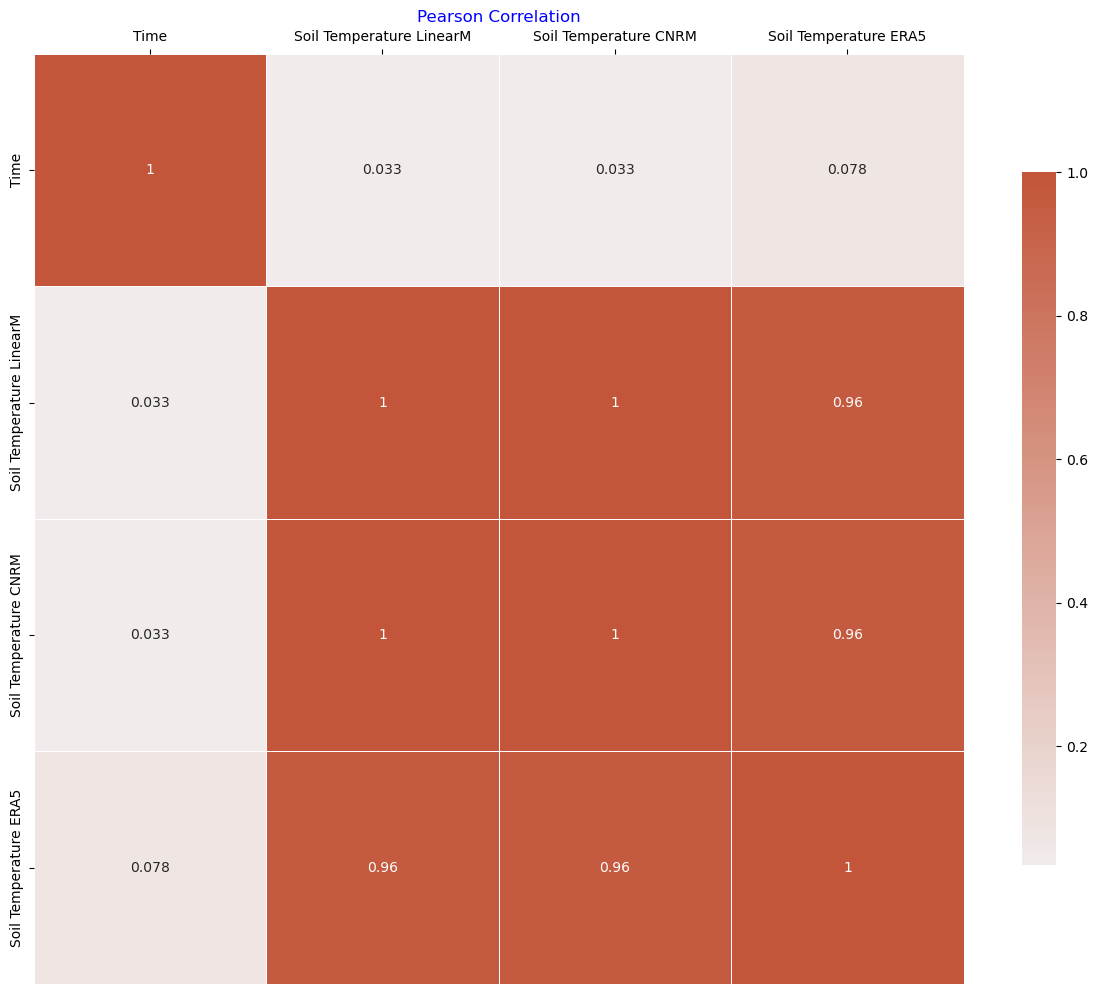

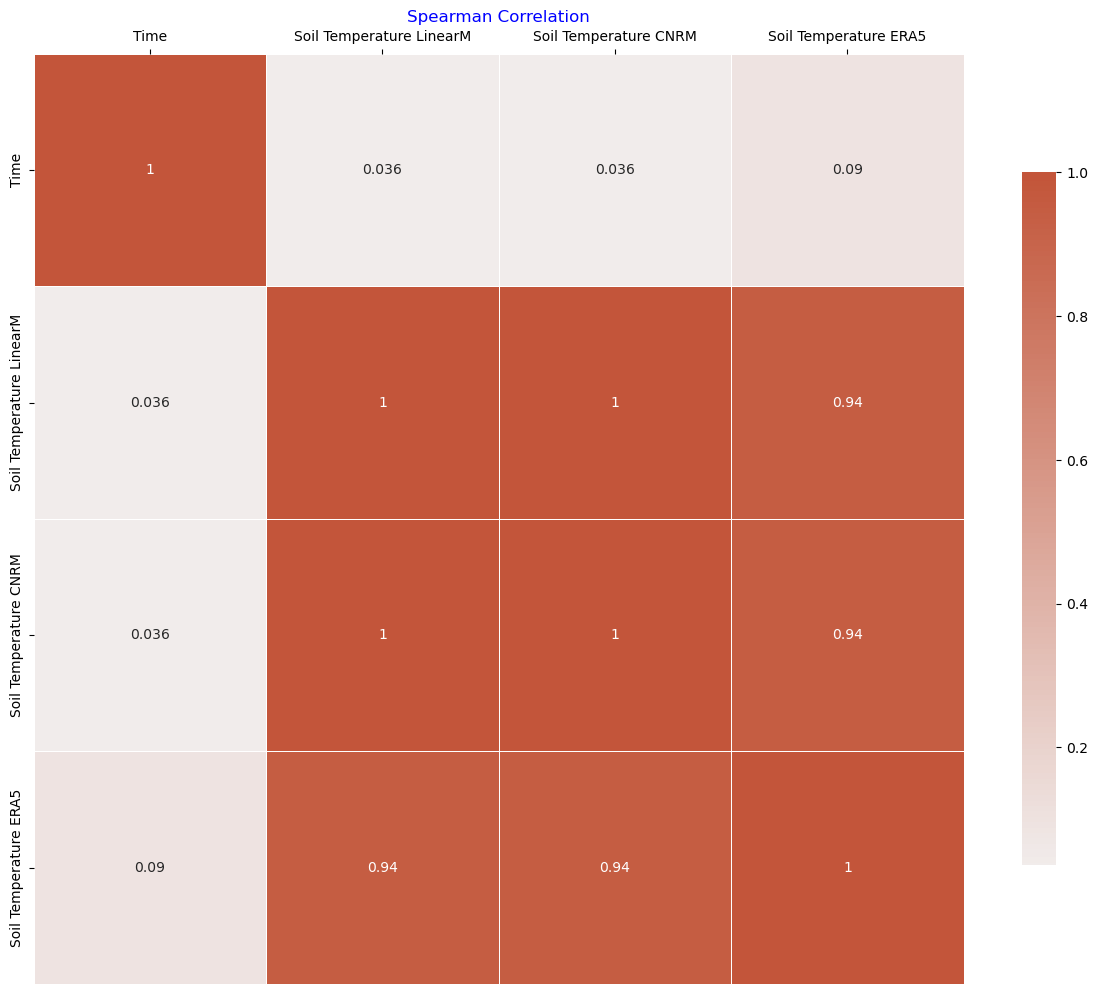

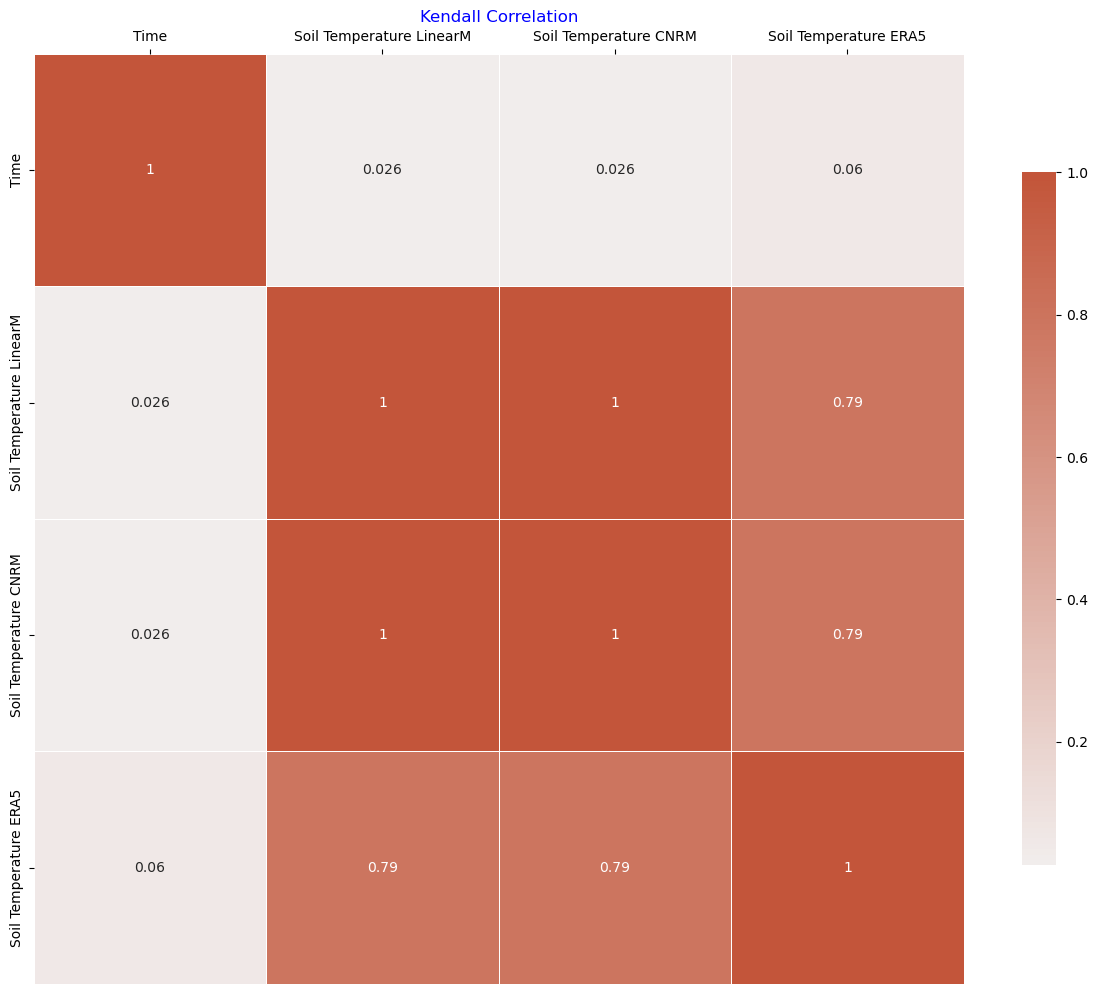

In [353]:
# Compute Correlations
corr_p = model_linear.corr("pearson")
corr_sp = model_linear.corr("spearman")
corr_k = model_linear.corr("kendall")

# List of correlations and titles
corrs = [("Pearson Correlation", corr_p), 
         ("Spearman Correlation", corr_sp), 
         ("Kendall Correlation", corr_k)]

# 📌 Set color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# 📌 Loop through each correlation matrix and plot
for title, corr in corrs:
    plt.figure(figsize=(15, 30))  # Create new figure for each plot
    ax = sns.heatmap(corr, cmap=cmap, vmax=1, center=0, annot=True,
                     square=True, linewidths=.5, cbar_kws={"shrink": .3})
    
    # Move X-axis labels to the top
    ax.xaxis.set_ticks_position("top")  
    ax.xaxis.set_label_position("top")  

    # Set dynamic title
    plt.title(title, color="blue")

    # Show plot
    plt.show()

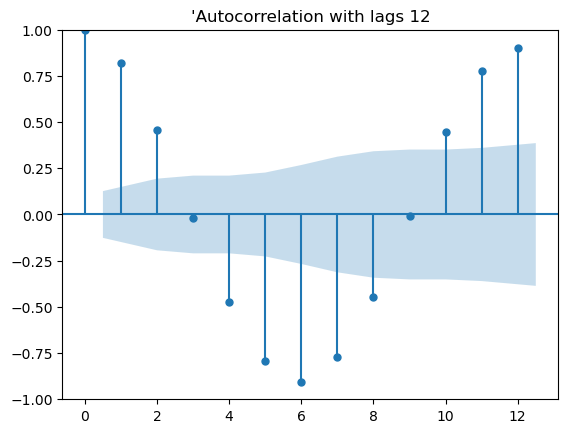

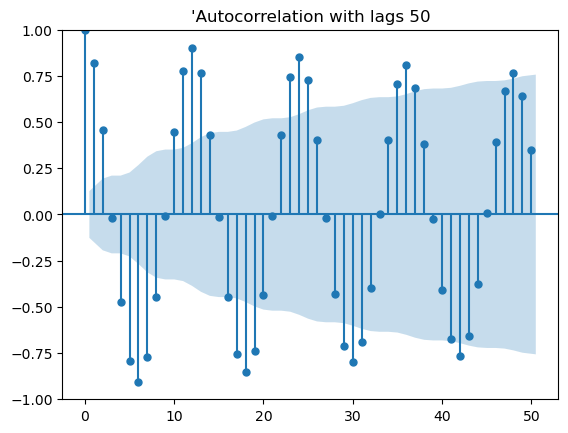

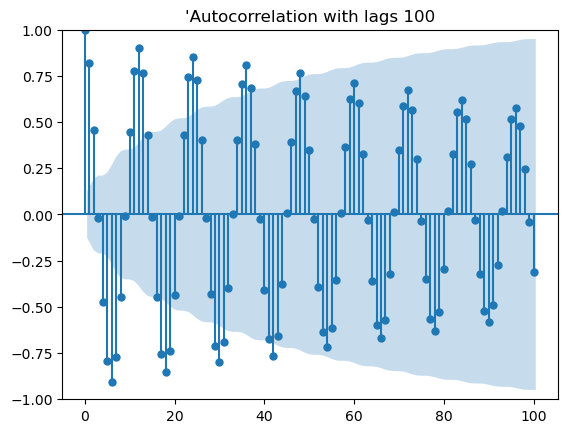

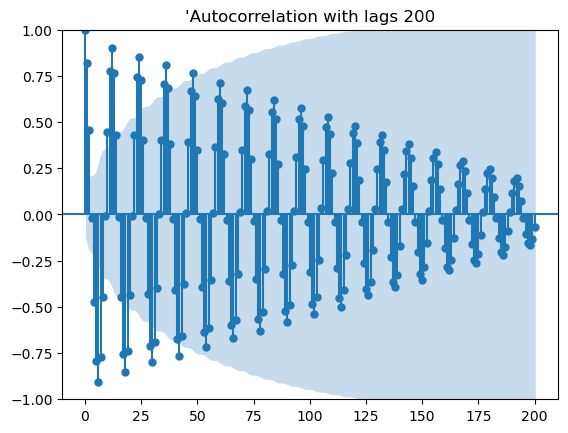

In [405]:
#Autocorrelation
import statsmodels.tsa.api as smt
lags = [12,50,100,200]
for l in lags:
    titles = "'Autocorrelation with lags "+ str(l)
    smt.graphics.plot_acf(df_soil_1["Soil Temperature CNRM"],lags=l,alpha=0.05,title=titles)

Text(0.5, 1.0, 'Lag with 3 months')

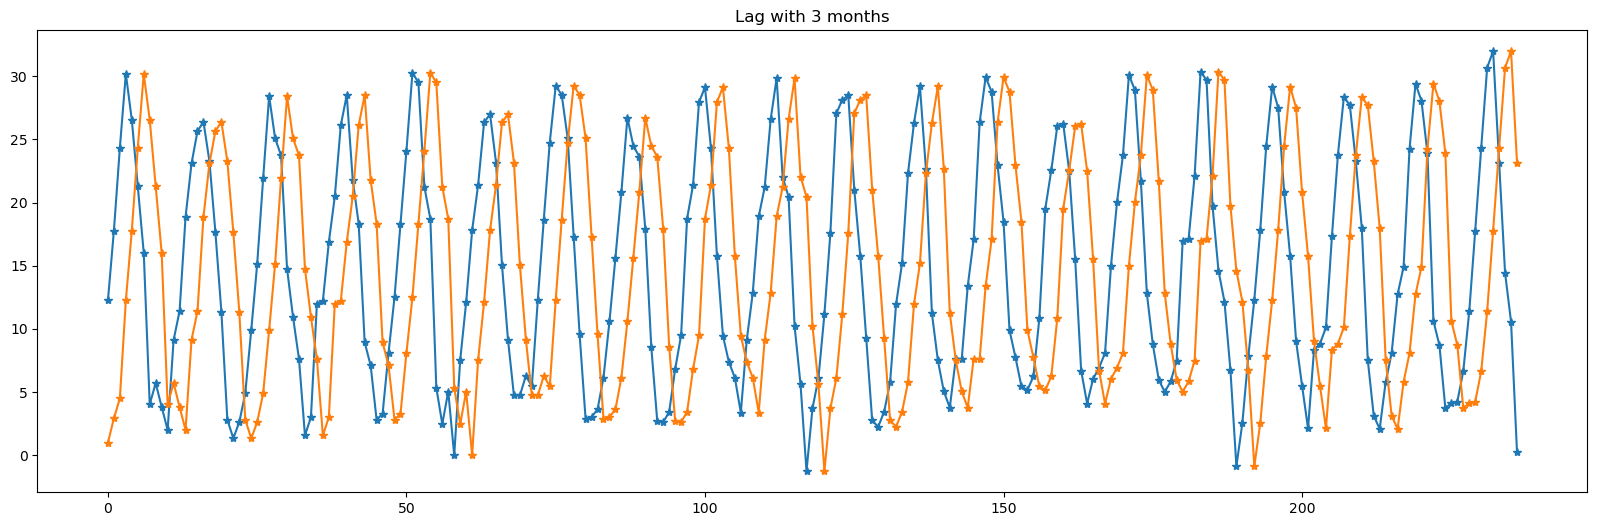

In [404]:
fig,ax=plt.subplots(figsize=(20, 6))
plt.plot(np.copy(df_soil_1["Soil Temperature CNRM"][3:]),"-*")
plt.plot(np.copy(df_soil_1["Soil Temperature CNRM"][:-3]),"-*")
plt.title("Lag with 3 months")

Text(0.5, 1.0, 'Lag with 6 months')

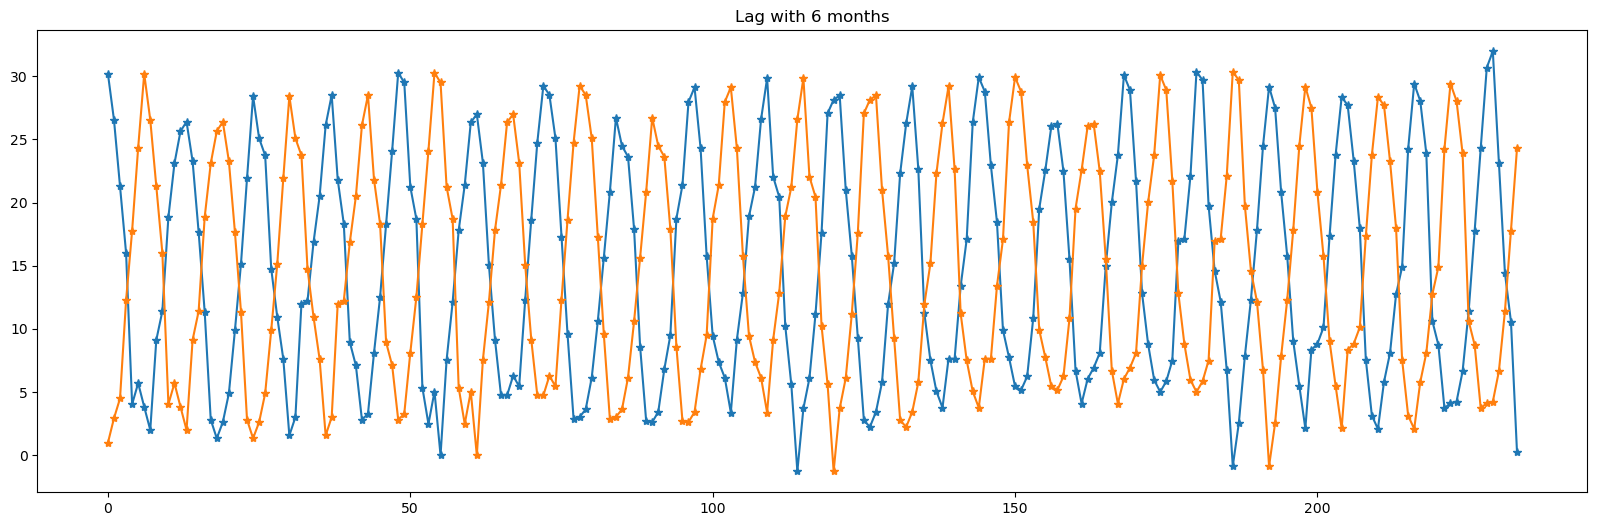

In [398]:
fig,ax=plt.subplots(figsize=(20, 6))
plt.plot(np.copy(df_soil_1["Soil Temperature CNRM"][6:]),"-*")
plt.plot(np.copy(df_soil_1["Soil Temperature CNRM"][:-6]),"-*")
plt.title("Lag with 6 months")

Text(0.5, 1.0, 'Lag with 12 months')

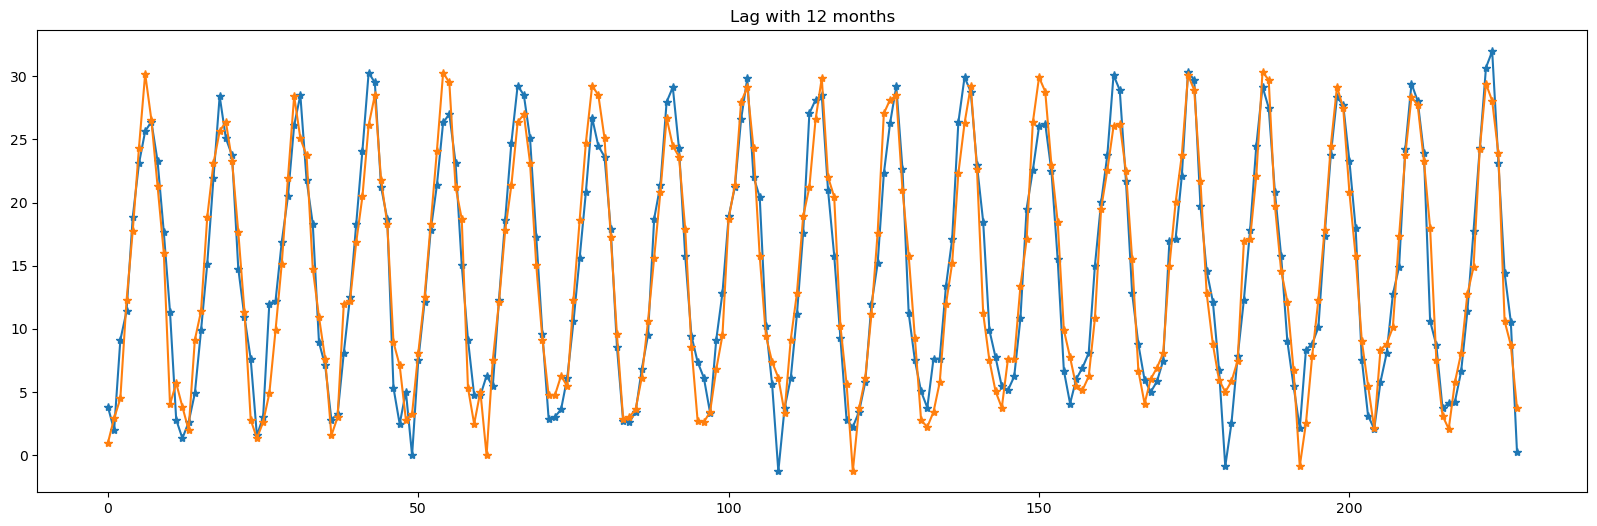

In [399]:
fig,ax=plt.subplots(figsize=(20, 6))
plt.plot(np.copy(df_soil_1["Soil Temperature CNRM"][12:]),"-*")
plt.plot(np.copy(df_soil_1["Soil Temperature CNRM"][:-12]),"-*")
plt.title("Lag with 12 months")


/var/folders/ff/ffsb431s31z932rd65wbw8hc0000gn/T/ipykernel_4296/1313727995.py:7: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


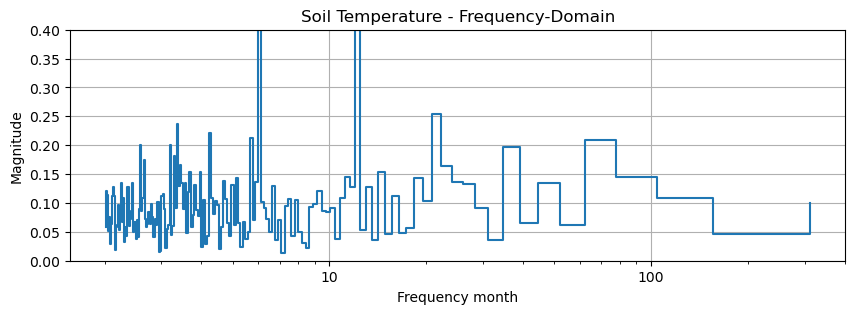

In [418]:

from numpy import fft


X = fft.fft(model_linear["Soil Temperature CNRM"])
N = len(X)
frequencies = fft.fftfreq(N, 1)
periods = 1 / frequencies
fft_magnitude = np.abs(X) / N

mask = frequencies >= 0

# Plot the Fourier Transform
fig, ax = plt.subplots(figsize=(10, 3))
ax.step(periods[mask], fft_magnitude[mask]) # Only plot positive frequencies
ax.set_xscale('log')
ax.xaxis.set_major_formatter('{x:,.0f}')
ax.set_title('Soil Temperature - Frequency-Domain')
ax.set_xlabel(r'Frequency month')
ax.set_ylabel('Magnitude')
plt.grid()
plt.ylim(0,0.4)
#plt.xlim(0,120)
plt.show()

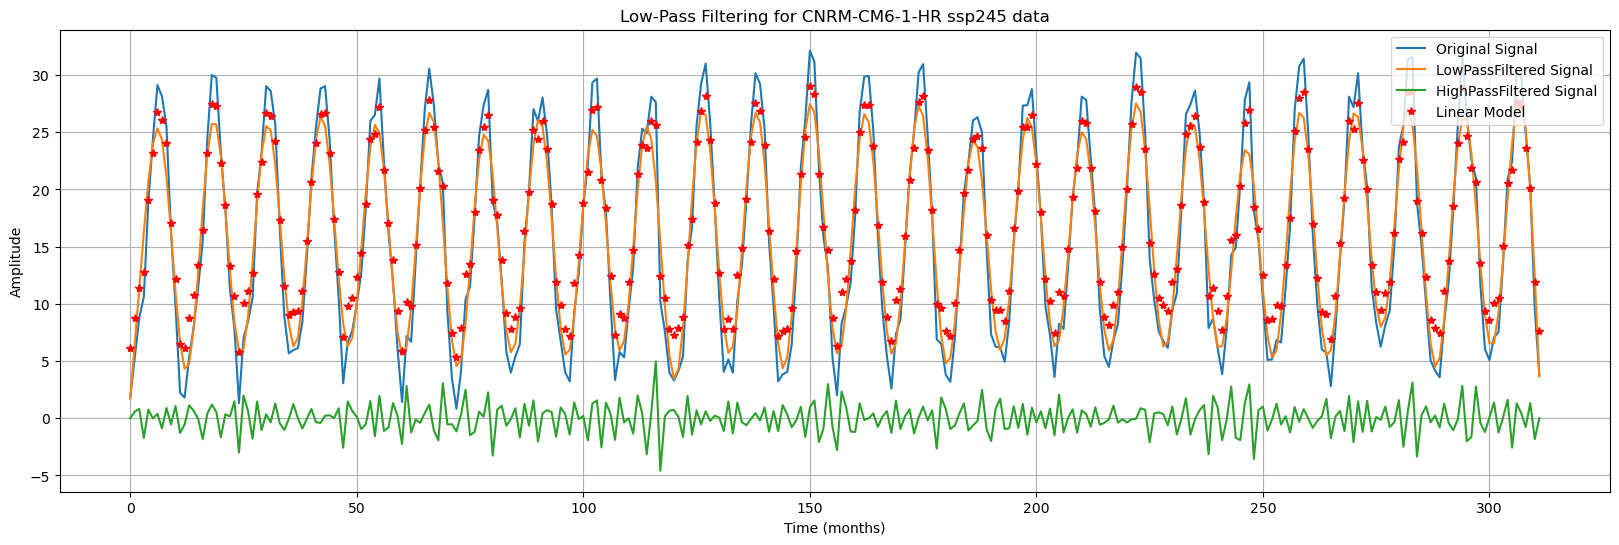

In [428]:
from scipy.signal import butter, filtfilt
# Filter parameters
cutoff_freq = 100  # Cutoff frequency in Hz
fs = 1000  # Sampling rate in Hz
order = 4  # Filter order
# Design the low-pass filter
nyq = 0.5 * fs
normal_cutoff = cutoff_freq / nyq
b, a = butter(order, normal_cutoff, btype='lowpass')
# Apply the filter
filtered_data = filtfilt(b, a, model_linear["Soil Temperature CNRM"])
model_linear['LowPassFiltered_CNRM'] = filtered_data

# Filter parameters
cutoff_freq = 200  # Cutoff frequency in Hz
fs = 1000  # Sampling rate in Hz
order = 4  # Filter order
# Design the high-pass filter (change btype to 'highpass')
nyq = 0.5 * fs
normal_cutoff = cutoff_freq / nyq
b, a = butter(order, normal_cutoff, btype='highpass')  # <-- modify here
# Apply the filter
filtered_data = filtfilt(b, a, model_linear["Soil Temperature CNRM"])
model_linear['HighPassFiltered_CNRM'] = filtered_data

fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(model_linear["Soil Temperature CNRM"], label='Original Signal')
plt.plot(model_linear['LowPassFiltered_CNRM'], label='LowPassFiltered Signal')
plt.plot(model_linear['HighPassFiltered_CNRM'], label='HighPassFiltered Signal')
plt.plot(model_linear["Soil Temperature LinearM"], "*",label='Linear Model' ,color='red')

plt.xlabel('Time (months)')
plt.ylabel('Amplitude')
plt.title('Low-Pass Filtering for CNRM-CM6-1-HR ssp245 data')
plt.legend(loc="upper right")
plt.grid(True)
     

In [ ]:
model_linear["Error_CNRM"]=model_linear["Soil Temperature CNRM"]-model_linear["Soil Temperature ERA5"]
model_linear["Error_LM"]=model_linear["Soil Temperature LinearM"]-model_linear["Soil Temperature ERA5"]


In [444]:
model_linear["Time"] =pd.to_datetime(model_linear["Time"])

In [456]:
import matplotlib.dates as mdates
times = model_linear["Time"][0:120]
plt.bar(x=times, y=model_linear["Error_CNRM"],width=10, color='blue', alpha=0.5, label='CNRM-CM6-1-HR ssp245 Error')
plt.bar(x=times, y=model_linear["Error_LM"],width=10, color='red', alpha=0.5, label='Linear Model Error')

plt.xticks(rotation=45, fontsize=5)

TypeError: bar() missing 1 required positional argument: 'height'

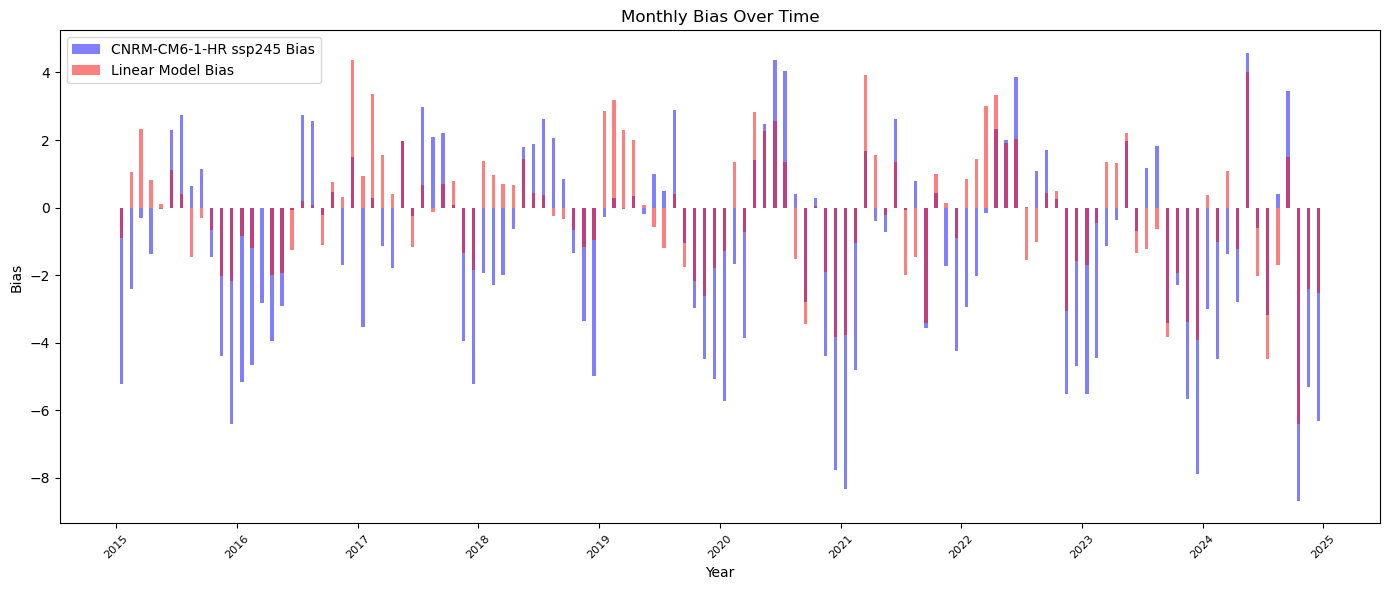

In [459]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Make sure Time is in datetime format
model_linear["Time"] = pd.to_datetime(model_linear["Time"])

# Take subset
subset = model_linear.iloc[:120]

# Extract values
times = subset["Time"]
errors_cnrn = subset["Error_CNRM"]
errors_lm = subset["Error_LM"]

# Create figure
plt.figure(figsize=(14, 6))

# Bar width in days
bar_width = 10  # adjust if needed
# Plot bars
plt.bar(times, errors_cnrn, width=bar_width, color='blue', alpha=0.5, label='CNRM-CM6-1-HR ssp245 Bias')
plt.bar(times, errors_lm, width=bar_width, color='red', alpha=0.5, label='Linear Model Bias')

# Format x-axis ticks to show only years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# X-tick style
plt.xticks(rotation=45, fontsize=8)

# Labels and legend
plt.xlabel("Year")
plt.ylabel("Bias")
plt.title("Monthly Bias Over Time")
plt.legend()
plt.tight_layout()
plt.show()

In [460]:
model_linear

,Time,Soil Temperature LinearM,Soil Temperature CNRM,Soil Temperature ERA5,LowPassFiltered_CNRM,HighPassFiltered_CNRM,Error_CNRM,Error_LM
0,2015-01-16 12:00:00,6.160129,1.840668,7.049225,1.705119,-0.001207,-5.208557,-0.889096
1,2015-02-15 00:00:00,8.756346,5.275543,7.698151,6.481112,0.584759,-2.422607,1.058195
2,2015-03-16 12:00:00,11.395950,8.767822,9.076080,11.374585,0.810000,-0.308258,2.319870
3,2015-04-16 00:00:00,12.789184,10.611115,11.971100,16.257113,-1.738327,-1.359985,0.818084
4,2015-05-16 12:00:00,19.075335,18.927887,18.981110,20.682926,0.755697,-0.053223,0.094225
...,...,...,...,...,...,...,...,...
307,2040-08-16 12:00:00,27.321712,29.838104,NaN,27.804890,0.450970,NaN,NaN
308,2040-09-16 00:00:00,23.582279,24.890717,NaN,25.283315,-0.763431,NaN,NaN
309,2040-10-16 12:00:00,20.083912,20.262268,NaN,19.893971,1.320344,NaN,NaN
310,2040-11-16 00:00:00,11.907494,9.444611,NaN,12.330263,-1.823866,NaN,NaN


In [ ]:
min_25to30= model_linear["Soil Temperature LinearM"].sel()

In [491]:
min_15to25=model_linear[(model_linear["Time"]>= "2015") & (model_linear["Time"]<"2025")].min()
max_15to25=model_linear[(model_linear["Time"]>= "2015") & (model_linear["Time"]<"2025")].max()
mean_15to25=model_linear[(model_linear["Time"]>= "2015") & (model_linear["Time"]<"2025")].mean()

In [494]:
print("Linear Model")
print("2015-2024")
print("Mean:",mean_15to25["Soil Temperature LinearM"])
print("Min: ",min_15to25["Soil Temperature LinearM"])
print("Max: ",max_15to25["Soil Temperature LinearM"])
print("Range:",max_15to25["Soil Temperature LinearM"]-min_15to25["Soil Temperature LinearM"])

Linear Model
2015-2024
Mean: 16.520617
Min:  5.388488
Max:  27.856579
Range: 22.46809


In [495]:
print("CNRM-CM6-1-HR Model")
print("2015-2024")
print("Mean:",mean_15to25["Soil Temperature CNRM"])
print("Min: ",min_15to25["Soil Temperature CNRM"])
print("Max: ",max_15to25["Soil Temperature CNRM"])
print("Range:",max_15to25["Soil Temperature CNRM"]-min_15to25["Soil Temperature CNRM"])

CNRM-CM6-1-HR Model
2015-2024
Mean: 15.5479145
Min:  0.8197632
Max:  30.545746
Range: 29.725983


In [496]:
print("ERA5")
print("2015-2024")
print("Mean:",mean_15to25["Soil Temperature ERA5"])
print("Min: ",min_15to25["Soil Temperature ERA5"])
print("Max: ",max_15to25["Soil Temperature ERA5"])
print("Range:",max_15to25["Soil Temperature ERA5"]-min_15to25["Soil Temperature ERA5"])

ERA5
2015-2024
Mean: 16.72373
Min:  4.8470764
Max:  28.174103
Range: 23.327026


In [486]:
min_25to30=model_linear[(model_linear["Time"]>= "2025") & (model_linear["Time"]<"2031")].min()
max_25to30=model_linear[(model_linear["Time"]>= "2025") & (model_linear["Time"]<"2031")].max()
mean_25to30=model_linear[(model_linear["Time"]>= "2025") & (model_linear["Time"]<"2031")].mean()
min_31to35=model_linear[(model_linear["Time"]>= "2031") & (model_linear["Time"]<"2036")].min()
max_31to35=model_linear[(model_linear["Time"]>= "2031") & (model_linear["Time"]<"2036")].max()
mean_31to35=model_linear[(model_linear["Time"]>= "2031") & (model_linear["Time"]<"2036")].mean()
min_36to40=model_linear[(model_linear["Time"]>= "2036") & (model_linear["Time"]<"2041")].min()
max_36to40=model_linear[(model_linear["Time"]>= "2036") & (model_linear["Time"]<"2041")].max()
mean_36to40=model_linear[(model_linear["Time"]>= "2036") & (model_linear["Time"]<"2041")].mean()


In [490]:
print("Linear Model")
print("2025-2030")
print("Mean:",mean_25to30["Soil Temperature LinearM"])
print("Min: ",min_25to30["Soil Temperature LinearM"])
print("Max: ",max_25to30["Soil Temperature LinearM"])
print("Range:",max_25to30["Soil Temperature LinearM"]-min_25to30["Soil Temperature LinearM"])
print("2031-2035")
print("Mean:",mean_31to35["Soil Temperature LinearM"])
print("Min: ",min_31to35["Soil Temperature LinearM"])
print("Max: ",max_31to35["Soil Temperature LinearM"])
print("Range:",max_31to35["Soil Temperature LinearM"]-min_31to35["Soil Temperature LinearM"])
print("2036-2040")
print("Mean:",mean_36to40["Soil Temperature LinearM"])
print("Min: ",min_36to40["Soil Temperature LinearM"])   
print("Max: ",max_36to40["Soil Temperature LinearM"])
print("Range:",max_36to40["Soil Temperature LinearM"]-min_36to40["Soil Temperature LinearM"])

Linear Model
2025-2030
Mean: 16.707893
Min:  6.286648
Max:  29.048306
Range: 22.761658
2031-2035
Mean: 16.755405
Min:  7.486701
Max:  28.91484
Range: 21.428139
2036-2040
Mean: 17.086872
Min:  6.8889117
Max:  28.86008
Range: 21.971169


In [489]:
print("CNRM-CM6-1-HR Model")
print("2025-2030")
print("Mean:",mean_25to30["Soil Temperature CNRM"])
print("Min: ",min_25to30["Soil Temperature CNRM"])
print("Max: ",max_25to30["Soil Temperature CNRM"])
print("Range:",max_25to30["Soil Temperature CNRM"]-min_25to30["Soil Temperature CNRM"])
print("2031-2035")
print("Mean:",mean_31to35["Soil Temperature CNRM"])
print("Min: ",min_31to35["Soil Temperature CNRM"])
print("Max: ",max_31to35["Soil Temperature CNRM"])
print("Range:",max_31to35["Soil Temperature CNRM"]-min_31to35["Soil Temperature CNRM"])
print("2036-2040")
print("Mean:",mean_36to40["Soil Temperature CNRM"])
print("Min: ",min_36to40["Soil Temperature CNRM"])   
print("Max: ",max_36to40["Soil Temperature CNRM"])
print("Range:",max_36to40["Soil Temperature CNRM"]-min_36to40["Soil Temperature CNRM"])

CNRM-CM6-1-HR Model
2025-2030
Mean: 15.7956915
Min:  2.0080566
Max:  32.122437
Range: 30.11438
2031-2035
Mean: 15.85855
Min:  3.5957642
Max:  31.945862
Range: 28.350098
2036-2040
Mean: 16.297087
Min:  2.8048706
Max:  31.873413
Range: 29.068542
